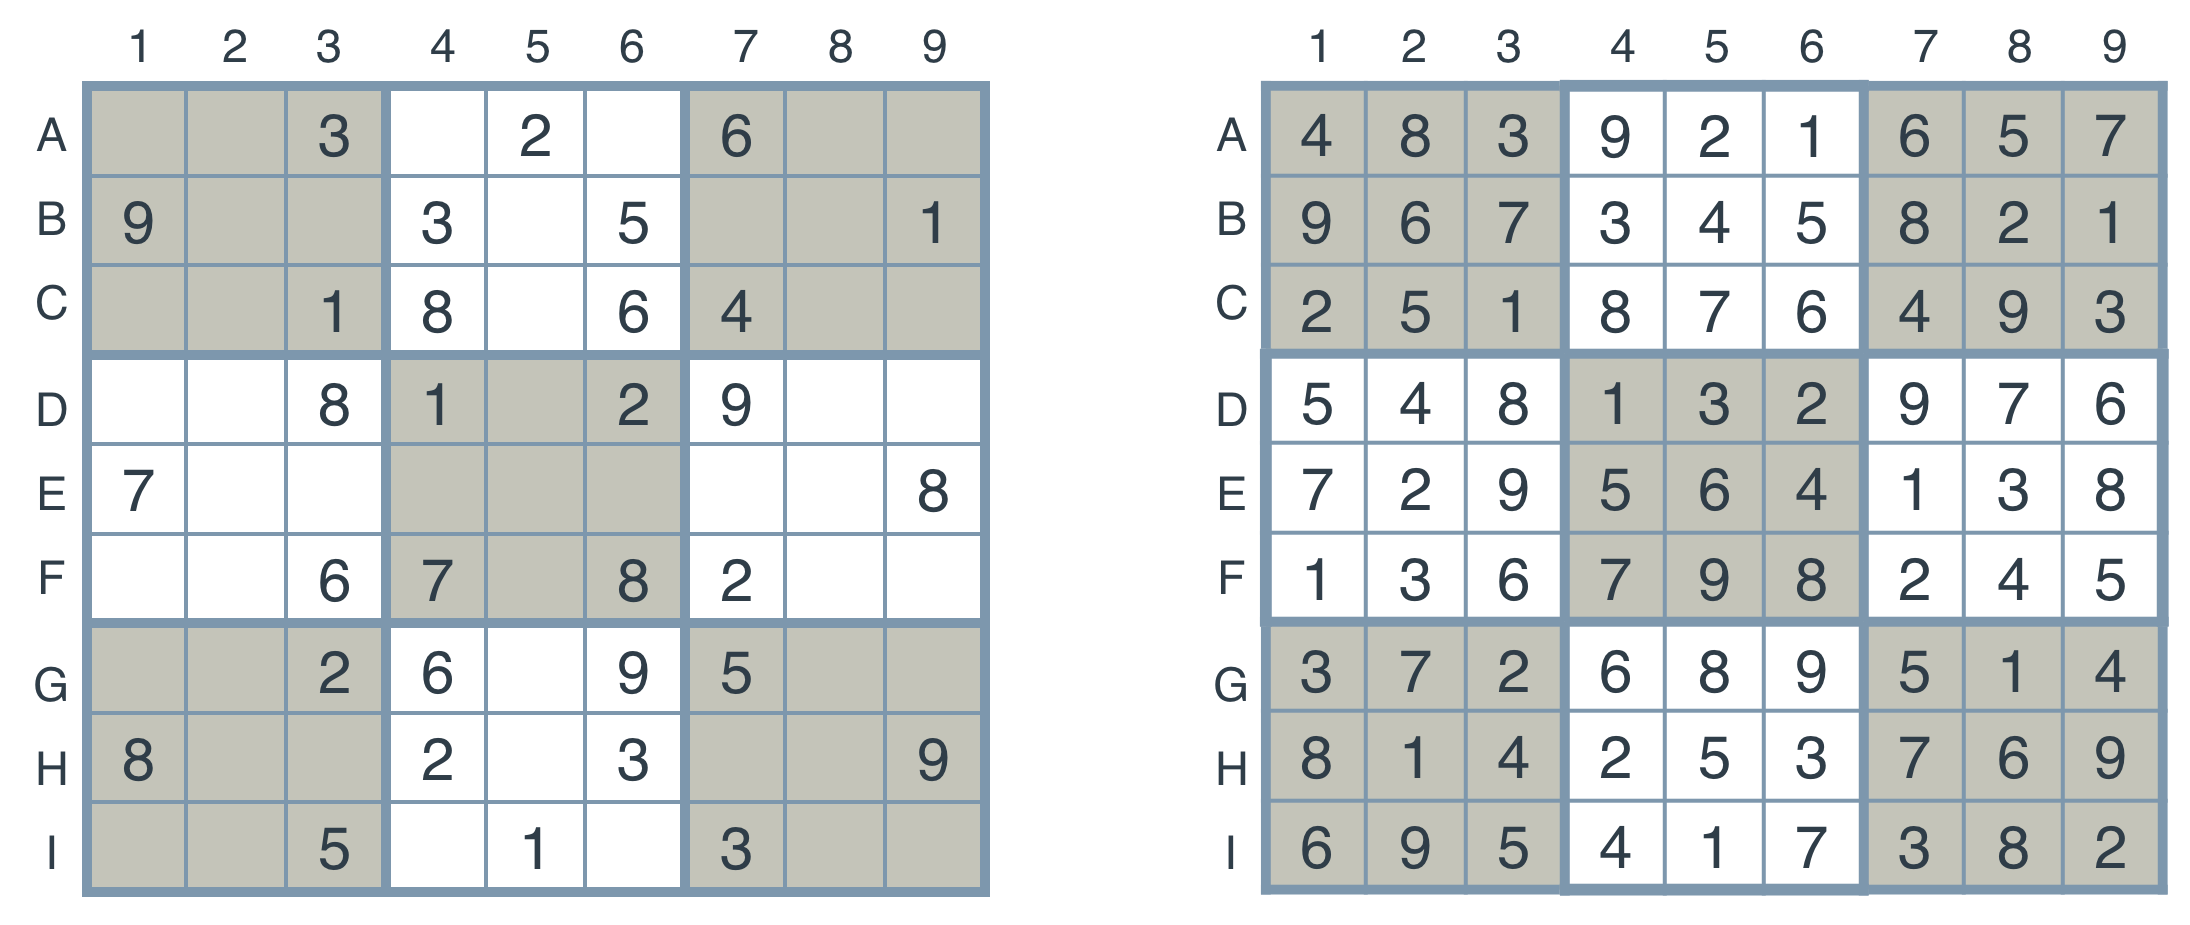

In [488]:
from IPython.core.display import Image, display
display(Image(r'C:\Users\VadymSerpak\Documents\ML\_Udacity_ND\AIND\T1_Project\labels.png'))

Now, in order to implement an agent, let's start by coding the board in Python. Then, we'll code the necessary functions to solve the Sudoku. We'll record the puzzles in two ways — as a string and as a dictionary.

The string will consist of a concatenation of all the readings of the digits in the rows, taking the rows from top to bottom. If the puzzle is not solved, we can use a . as a placeholder for an empty box.

For example, the unsolved puzzle at the above left will be written as: <i>..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..</i>

And the solved puzzle at the above right, will be recorded as: <i>483921657967345821251876493548132976729564138136798245372689514814253769695417382</i>

We'll implement the dictionary as follows. The keys will be strings corresponding to the boxes — namely, 'A1', 'A2', ..., 'I9'. The values will either be the digit in each box (if there is one) or a '.' (if not).

So, let's get started. First, we'll record rows and columns as strings.

In [489]:
rows = 'ABCDEFGHI'
cols = '123456789'

In [490]:
def cross(a, b):
    return [s+t for s in a for t in b]

In [491]:
boxes = cross(rows, cols)
print(boxes)
len(boxes)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9']


81

In [492]:
boxes[0]

'A1'

In [493]:
# Units
row_units = [cross(r,cols) for r in rows]
col_units = [cross(rows,c) for c in cols]
square_units = [cross(rs,cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')]
unitlist = row_units +  col_units + square_units
units = dict((s, [u for u in unitlist if s in u]) for s in boxes)
units

{'A1': [['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'],
  ['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1'],
  ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']],
 'A2': [['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'],
  ['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'I2'],
  ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']],
 'A3': [['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'],
  ['A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3', 'H3', 'I3'],
  ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']],
 'A4': [['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'],
  ['A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4', 'I4'],
  ['A4', 'A5', 'A6', 'B4', 'B5', 'B6', 'C4', 'C5', 'C6']],
 'A5': [['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'],
  ['A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5', 'I5'],
  ['A4', 'A5', 'A6', 'B4', 'B5', 'B6', 'C4', 'C5', 'C6']],
 'A6': [['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'],
  ['A6', 'B6', 'C6', 'D6', 'E6'

In [494]:
# Peers
peers = dict((s, set(sum(units[s],[]))-set([s])) for s in boxes)
peers

{'A1': {'A2',
  'A3',
  'A4',
  'A5',
  'A6',
  'A7',
  'A8',
  'A9',
  'B1',
  'B2',
  'B3',
  'C1',
  'C2',
  'C3',
  'D1',
  'E1',
  'F1',
  'G1',
  'H1',
  'I1'},
 'A2': {'A1',
  'A3',
  'A4',
  'A5',
  'A6',
  'A7',
  'A8',
  'A9',
  'B1',
  'B2',
  'B3',
  'C1',
  'C2',
  'C3',
  'D2',
  'E2',
  'F2',
  'G2',
  'H2',
  'I2'},
 'A3': {'A1',
  'A2',
  'A4',
  'A5',
  'A6',
  'A7',
  'A8',
  'A9',
  'B1',
  'B2',
  'B3',
  'C1',
  'C2',
  'C3',
  'D3',
  'E3',
  'F3',
  'G3',
  'H3',
  'I3'},
 'A4': {'A1',
  'A2',
  'A3',
  'A5',
  'A6',
  'A7',
  'A8',
  'A9',
  'B4',
  'B5',
  'B6',
  'C4',
  'C5',
  'C6',
  'D4',
  'E4',
  'F4',
  'G4',
  'H4',
  'I4'},
 'A5': {'A1',
  'A2',
  'A3',
  'A4',
  'A6',
  'A7',
  'A8',
  'A9',
  'B4',
  'B5',
  'B6',
  'C4',
  'C5',
  'C6',
  'D5',
  'E5',
  'F5',
  'G5',
  'H5',
  'I5'},
 'A6': {'A1',
  'A2',
  'A3',
  'A4',
  'A5',
  'A7',
  'A8',
  'A9',
  'B4',
  'B5',
  'B6',
  'C4',
  'C5',
  'C6',
  'D6',
  'E6',
  'F6',
  'G6',
  'H6',
  'I6'}

Now, we're ready to turn the string representation of a sudoku into a dictionary representation. That'll be your turn to shine!

Implement grid_values()
A function to convert the string representation of a puzzle into a dictionary form.
Recall that for the string:

<b>'..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'</b>

...we'd like to return the dictionary:

    {
      'A1': '.'
      'A2': '.',
      'A3': '3',
      'A4': '.',
      'A5': '2',
      ...
      'I9': '.'
    }
    
Implement a function called grid_values() that performs this task.



In [495]:
grid = '..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'
#grid_values(grid)
lst = list(enumerate(grid))
lst[0][1]
lst[2][1]

'3'

In [496]:
ind = list(enumerate(boxes))
ind[0][1]
ind[2][1]

'A3'

In [497]:
val = dict((k[1], [v[1] for v in lst][k[0]]) for k in ind)
print(val)

{'A1': '.', 'A2': '.', 'A3': '3', 'A4': '.', 'A5': '2', 'A6': '.', 'A7': '6', 'A8': '.', 'A9': '.', 'B1': '9', 'B2': '.', 'B3': '.', 'B4': '3', 'B5': '.', 'B6': '5', 'B7': '.', 'B8': '.', 'B9': '1', 'C1': '.', 'C2': '.', 'C3': '1', 'C4': '8', 'C5': '.', 'C6': '6', 'C7': '4', 'C8': '.', 'C9': '.', 'D1': '.', 'D2': '.', 'D3': '8', 'D4': '1', 'D5': '.', 'D6': '2', 'D7': '9', 'D8': '.', 'D9': '.', 'E1': '7', 'E2': '.', 'E3': '.', 'E4': '.', 'E5': '.', 'E6': '.', 'E7': '.', 'E8': '.', 'E9': '8', 'F1': '.', 'F2': '.', 'F3': '6', 'F4': '7', 'F5': '.', 'F6': '8', 'F7': '2', 'F8': '.', 'F9': '.', 'G1': '.', 'G2': '.', 'G3': '2', 'G4': '6', 'G5': '.', 'G6': '9', 'G7': '5', 'G8': '.', 'G9': '.', 'H1': '8', 'H2': '.', 'H3': '.', 'H4': '2', 'H5': '.', 'H6': '3', 'H7': '.', 'H8': '.', 'H9': '9', 'I1': '.', 'I2': '.', 'I3': '5', 'I4': '.', 'I5': '1', 'I6': '.', 'I7': '3', 'I8': '.', 'I9': '.'}


In [498]:
def grid_values(grid):
    """Convert grid string into {<box>: <value>} dict with '.' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '.' if it is empty.
    """
    lst = list(enumerate(grid))
    ind = list(enumerate(boxes))
    val = dict((k[1], [v[1] for v in lst][k[0]]) for k in ind)
    return val

In [499]:
def display_table(values):
    """
    Display the values as a 2-D grid.
    Input: The sudoku in dictionary form
    Output: None
    """
    width = 1 + max(len(values[s]) for s in boxes)
    line = '+'.join(['-'*(width*3)]*3)
    for r in rows:
        print(''.join(values[r+c].center(width)+('|' if c in '36' else '')
                      for c in cols))
        if r in 'CF': print(line)
    return

In [500]:
values = grid_values(grid)
display_table(values)

. . 3 |. 2 . |6 . . 
9 . . |3 . 5 |. . 1 
. . 1 |8 . 6 |4 . . 
------+------+------
. . 8 |1 . 2 |9 . . 
7 . . |. . . |. . 8 
. . 6 |7 . 8 |2 . . 
------+------+------
. . 2 |6 . 9 |5 . . 
8 . . |2 . 3 |. . 9 
. . 5 |. 1 . |3 . . 


The Udacity solution of the function:

In [501]:
def grid_values(grid):
    """Convert grid string into {<box>: <value>} dict with '.' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '.' if it is empty.
    """
    assert len(grid) == 81, "Input grid must be a string of length 81 (9x9)"
    return dict(zip(boxes, grid))

<b>zip(*iterables)</b>
Make an iterator that aggregates elements from each of the iterables.

Returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables. The iterator stops when the shortest input iterable is exhausted. With a single iterable argument, it returns an iterator of 1-tuples. With no arguments, it returns an empty iterator. 

The left-to-right evaluation order of the iterables is guaranteed. This makes possible an idiom for clustering a data series into n-length groups using zip(*[iter(s)]*n).

zip() should only be used with unequal length inputs when you don’t care about trailing, unmatched values from the longer iterables. If those values are important, use itertools.zip_longest() instead.

zip() in conjunction with the * operator can be used to unzip a list:

    >> x = [1, 2, 3]
    >> y = [4, 5, 6]
    >> zipped = zip(x, y)
    >> list(zipped)
    [(1, 4), (2, 5), (3, 6)]
    >> x2, y2 = zip(*zip(x, y))
    >> x == list(x2) and y == list(y2)
    True

Insight: We can eliminate possible values for a box by looking at its peers
Ok, time to start solving the Sudoku!

First things first, let's look at a box and analyze the values that could go in there.

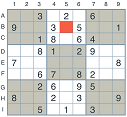

In [502]:
display(Image(r'C:\Users\VadymSerpak\Documents\ML\_Udacity_ND\AIND\T1_Project\reduce-values.png'))

The possible values are 4 and 7. What did we do to figure this out? Well, all the other values already appear either in the same column, row, or 3x3 square of the highlighted box, so we conclude that they can't be a value for this box. In other words, we used the following strategy.

## Strategy 1: Elimination

<b>If a box has a value assigned, then none of the peers of this box can have this value.</b>


Now that we know how to eliminate values, we can take one pass, go over every box that has a value, and eliminate the values that can't appear on the box, based on its peers. Once we do so, the board looks like this (for clarity, we've highlighted the original filled-in boxes in bold lettering):

(Notice that if we take a second pass through the puzzle, we can gain even more information, but this is not necessary for now.)

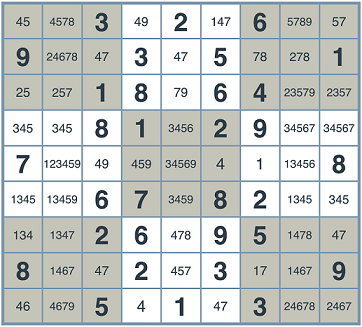

In [204]:
display(Image(r'C:\Users\VadymSerpak\Documents\ML\_Udacity_ND\AIND\T1_Project\values-easy.png'))

<b>Improved <i>grid_values()</i></b>

As of now, we are recording the puzzles in dictionary form, where the keys are the boxes ('A1', 'A2', ... , 'I9') and the values are either the value for each box (if a value exists) or '.' (if the box has no value assigned yet). What we really want is for each value to represent all the available values for that box. For example, the box in the second row and fifth column above will have key 'B5' and value '47' (because 4 and 7 are the only possible values for it). The starting value for every empty box will thus be '123456789'.

Update the grid_values() function to return '123456789' instead of '.' for empty boxes.

In [235]:
def grid_values(grid):
    """Convert grid string into {<box>: <value>} dict with '.' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '.' if it is empty.
    """
    lst = list(enumerate(grid))
    ind = list(enumerate(boxes))
    num = '123456789'
    for i in range(len(lst)):
        if lst[i][1] == '.':
            lst[i] = (i,num)
    val = dict((k[1], [v[1] for v in lst][k[0]]) for k in ind)
    return val

In [237]:
# The Udacity solution:
def grid_values(grid):
    """Convert grid string into {<box>: <value>} dict with '123456789' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '123456789' if it is empty.
    """
    values = []
    all_digits = '123456789'
    for c in grid:
        if c == '.':
            values.append(all_digits)
        elif c in all_digits:
            values.append(c)
    assert len(values) == 81
    return dict(zip(boxes, values))

In [236]:
values = grid_values(grid)
display_table(values)

123456789 123456789     3     |123456789     2     123456789 |    6     123456789 123456789 
    9     123456789 123456789 |    3     123456789     5     |123456789 123456789     1     
123456789 123456789     1     |    8     123456789     6     |    4     123456789 123456789 
------------------------------+------------------------------+------------------------------
123456789 123456789     8     |    1     123456789     2     |    9     123456789 123456789 
    7     123456789 123456789 |123456789 123456789 123456789 |123456789 123456789     8     
123456789 123456789     6     |    7     123456789     8     |    2     123456789 123456789 
------------------------------+------------------------------+------------------------------
123456789 123456789     2     |    6     123456789     9     |    5     123456789 123456789 
    8     123456789 123456789 |    2     123456789     3     |123456789 123456789     9     
123456789 123456789     5     |123456789     1     123456789 |    3   

<b>Implement <i>eliminate()</i></b>


Now, let's finish the code for the function eliminate(), which will take as input a puzzle in dictionary form. The function will iterate over all the boxes in the puzzle that only have one value assigned to them, and it will remove this value from every one of its peers.

In [299]:
print(peers['A1'])
type(peers)
type(peers['A1'])

{'F1', 'A5', 'A2', 'B1', 'B2', 'A4', 'E1', 'A6', 'D1', 'C1', 'A3', 'A9', 'B3', 'A8', 'C3', 'I1', 'G1', 'H1', 'A7', 'C2'}


set

In [417]:
def eliminate(values):
    """Eliminate values from peers of each box with a single value.

    Go through all the boxes, and whenever there is a box with a single value,
    eliminate this value from the set of values of all its peers.

    Args:
        values: Sudoku in dictionary form.
    Returns:
        Resulting Sudoku in dictionary form after eliminating values.
    """
    val = grid_values(grid)
    num = '123456789'
    max_len = len(num)
    for ind, box in enumerate(boxes):
        if val[box] == num:
            num_box = num
#            print("\n{} {}".format(boxes[ind],val[box]))
#            print(peers[boxes[ind]])
            for peer_val in (peers[boxes[ind]]):
                if len(val[peer_val]) < max_len:
#                    print('\n{} {}   {}'.format(val[peer_val],num.index(str(val[peer_val])),num_box))
                    try:
                        num_box = ''.join([num_box[i] for i in range(len(num_box)) if i != num_box.index(str(val[peer_val]))])
                    except ValueError:
                        continue
#                    print(num_box)
                    values[boxes[ind]] = num_box
    return values
#eliminate(values)

In [418]:
display_table(values)

   45    4578    3   |   49     2     147  |   6     5789    57  
   9    24678    47  |   3      47     5   |   78    278     1   
   25    257     1   |   8      79     6   |   4    23579   2357 
---------------------+---------------------+---------------------
  345    345     8   |   1     3456    2   |   9    34567  34567 
   7    123459   49  |  459   34569    4   |   1    13456    8   
  1345  13459    6   |   7     3459    8   |   2     1345   345  
---------------------+---------------------+---------------------
  134    1347    2   |   6     478     9   |   5     1478    47  
   8     1467    47  |   2     457     3   |   17    1467    9   
   46    4679    5   |   4      1      47  |   3    24678   2467 


Let's actually look more carefully at the top 3x3 square in the center, highlighted in red.

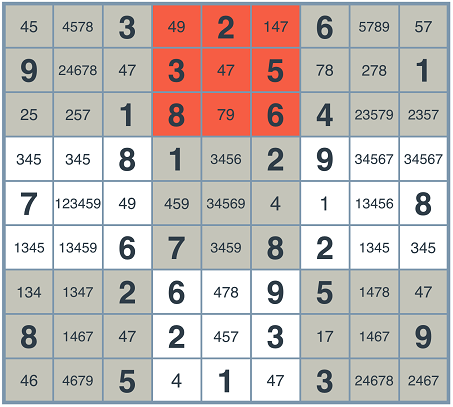

In [420]:
display(Image(r'C:\Users\VadymSerpak\Documents\ML\_Udacity_ND\AIND\T1_Project\highlighted-unit.png'))

## Strategy 2: Only Choice

<b>If there is only one box in a unit which would allow a certain digit, then that box must be assigned that digit.</b>

Time to code it! In the next quiz, finish the code for the function only_choice, which will take as input a puzzle in dictionary form. The function will go through all the units, and if there is a unit with a digit that only fits in one possible box, it will assign that digit to that box.

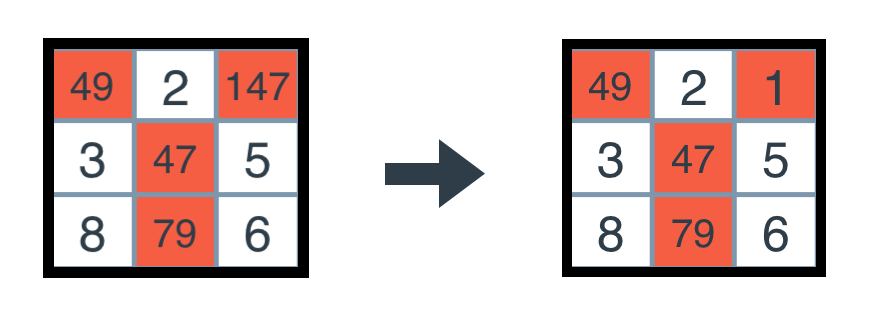

In [421]:
display(Image(r'C:\Users\VadymSerpak\Documents\ML\_Udacity_ND\AIND\T1_Project\only-choice.png'))

In [487]:
def only_choice(values):
    """Finalize all values that are the only choice for a unit.

    Go through all the units, and whenever there is a unit with a value
    that only fits in one box, assign the value to this box.

    Input: Sudoku in dictionary form.
    Output: Resulting Sudoku in dictionary form after filling in only choices.
    """
    # TODO: Implement only choice strategy here
    for square in square_units:
        print(square)
        for box_val in square: 
#            print(box_val)
            if int(values[box_val]) > 9:
                print(values[box_val])
                num = ''
                for c in values[box_val]:
                    print(c)
#                break
    return 0
only_choice(values)

['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']
['A4', 'A5', 'A6', 'B4', 'B5', 'B6', 'C4', 'C5', 'C6']
['A7', 'A8', 'A9', 'B7', 'B8', 'B9', 'C7', 'C8', 'C9']
['D1', 'D2', 'D3', 'E1', 'E2', 'E3', 'F1', 'F2', 'F3']
['D4', 'D5', 'D6', 'E4', 'E5', 'E6', 'F4', 'F5', 'F6']
['D7', 'D8', 'D9', 'E7', 'E8', 'E9', 'F7', 'F8', 'F9']
['G1', 'G2', 'G3', 'H1', 'H2', 'H3', 'I1', 'I2', 'I3']
['G4', 'G5', 'G6', 'H4', 'H5', 'H6', 'I4', 'I5', 'I6']
['G7', 'G8', 'G9', 'H7', 'H8', 'H9', 'I7', 'I8', 'I9']


0

In [457]:
square_units

[['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'],
 ['A4', 'A5', 'A6', 'B4', 'B5', 'B6', 'C4', 'C5', 'C6'],
 ['A7', 'A8', 'A9', 'B7', 'B8', 'B9', 'C7', 'C8', 'C9'],
 ['D1', 'D2', 'D3', 'E1', 'E2', 'E3', 'F1', 'F2', 'F3'],
 ['D4', 'D5', 'D6', 'E4', 'E5', 'E6', 'F4', 'F5', 'F6'],
 ['D7', 'D8', 'D9', 'E7', 'E8', 'E9', 'F7', 'F8', 'F9'],
 ['G1', 'G2', 'G3', 'H1', 'H2', 'H3', 'I1', 'I2', 'I3'],
 ['G4', 'G5', 'G6', 'H4', 'H5', 'H6', 'I4', 'I5', 'I6'],
 ['G7', 'G8', 'G9', 'H7', 'H8', 'H9', 'I7', 'I8', 'I9']]